<table style="width:100%"><tr>
<td> 
    
Technische Universität Berlin\
Electrical Engineering and Computer Science\
Internet of Things for Smart Buildings\
Prof. Dr. Sergio Lucia, Felix Fiedler, Benjamin Karg </td>
<td>  <img src="logo_tu.png" style="width: 20%;" align="right"/> </td>
</tr>
</table>

***
**MPC 20 - Exercise 02**
***

# <span class="graffiti-highlight graffiti-id_2hkv6mq-id_kth1xog"><i></i>Please click here!</span>

# CasADi Tutorial

In this exercise we will explore the Python library [CasADi](https://web.casadi.org/docs/).
We will use this library extensively in the upcoming exercise(s) and your projects.

## What is CasADi (and what is it not)?
CasADi started out as a tool for algorithmic differentiation (AD) using a syntax borrowed from computer algebra systems (CAS), which explains its name. While AD still forms one of the core functionalities of the tool, the scope of the tool has since been considerably broadened, with the addition of support for ODE/DAE integration and sensitivity analysis, nonlinear programming and interfaces to other numerical tools. In its current form, it is a general-purpose tool for gradient-based numerical optimization – with a strong focus on optimal control – and CasADi is just a name without any particular meaning.

It is important to point out that CasADi is not a conventional AD tool, that can be used to calculate derivative information from existing user code with little to no modification. If you have an existing model written in C++, Python or MATLAB/Octave, you need to be prepared to reimplement the model using CasADi syntax.

Secondly, CasADi is not a computer algebra system. While the symbolic core does include an increasing set of tools for manipulate symbolic expressions, these capabilities are very limited compared to a proper CAS tool.

Finally, CasADi is not an “optimal control problem solver”, that allows the user to enter an OCP and then gives the solution back. Instead, it tries to provide the user with a set of “building blocks” that can be used to implement general-purpose or specific-purpose OCP solvers efficiently with a modest programming effort.

**Taken from:** [CasADi](https://web.casadi.org/docs/)

## Install CasADi
- If you are using this Notebook from **Binder**, CasADi will be already installed. Binder checks the included `requirements.txt` file and uses `pip` to install all listed packages.
- If you are working locally, use: `pip install casadi`. This should be executed in a terminal, prior to launching the Jupyter Noteboook.
   

## <span class="graffiti-highlight graffiti-id_rqy9wk4-id_66aabzh"><i></i>First steps with CasADi</span>
We start by importing CasADi as well as some previously introduced packages for Python.

In [1]:
# Import everything (*) from casadi
from casadi import *
# We also already import matplotlib for plotting:
import matplotlib.pyplot as plt
# And numpy because we cant live without numpy (it gives as matrices <3:
import numpy as np

In [2]:
# Define a symbol
x = SX.sym("x")
x

SX(x)

In [3]:
# Any expression that uses a symbol is also a symbol
a = 3*x**2
print(a)

(3*sq(x))


In [4]:
# You can define a vector of symbols of any size
y = SX.sym("y",5)
print(y)

[y_0, y_1, y_2, y_3, y_4]


More information about CasADi in general and the available operations in particular can be found in this [List of Operations in CasADi](https://web.casadi.org/docs/#list-of-operations).


In [5]:
# Define a CasADi function
my_fun = Function('my_fun',[x],[x**2+5])
my_fun

Function(my_fun:(i0)->(o0) SXFunction)

The printed output reveals some information about the function: We have one input i0 and one output o0. We can also see that both input and output are scalar values, as CasADi would indicate vectors / matrices with their respective dimensions, e.g.:
```
Function(my_fun:(i0[3])->(o0) SXFunction)
```

Of course we can evaluate our function. The most straight-forward way to do so is to call it with a numerical input, e.g.:

In [9]:
# Evaluate your function numerically
my_fun(10)

DM(105)

Note that DM is the CasADi data type for numerical values. Further information can be found [here](https://web.casadi.org/docs/#dm). 
Sometimes it can be important to convert this back to the numpy format with:


```
DM(105).full()
```
Feel free to try this method with the function output above.


As we will see for the MPC application later, it is even more useful to evaluate the above function symbolically. This is also straight-forward:



In [7]:
# Evaluate your function symbolically
my_fun(x)

SX((sq(x)+5))

### <span class="graffiti-highlight graffiti-id_4hpz5ul-id_2p8xkof"><i></i>Symbolic arrays</span>
CasADi fully supports vectors and matrices, which can be created like this:

In [10]:
vector = SX.sym('vector', 4,1)
matrix = SX.sym('matrix', 4,4)

print(vector.shape)
print(matrix.shape)

(4, 1)
(4, 4)


Everything can be indexed similar to Numpy:

In [11]:
v = SX.sym('v', 4)

v[0:2]

SX([v_0, v_1])

Sometimes we need to concatenate arrays:

In [12]:
w = SX.sym('w', 4)

vertcat(v,w)

SX([v_0, v_1, v_2, v_3, w_0, w_1, w_2, w_3])

In [13]:
horzcat(v,w)

SX(
[[v_0, w_0], 
 [v_1, w_1], 
 [v_2, w_2], 
 [v_3, w_3]])

The difference is the resulting shape:

In [14]:
vertcat(v,w).shape

(8, 1)

In [15]:
horzcat(v,w).shape

(4, 2)

## Task 01: Working with symbolic expressions
One of the main perks of working with symbolic CasADi expressions is the possibility to obtain exact derivatives of arbitrary expressions with **Automatic Differentiation** (AD).

1. Create a nested expression in a loop, where $$y_{k+1}=y_{k}\cdot sin(y_k)$$ and $y_0 = x$ for $k=0\dots10$. In the end you have a scalar expression: $$y_{10}=f(x)$$
2. Print the expression y and investigate the output. Do you recognize the intermediate variables that are typical for the AD expression graph?


In [45]:
# Write your code here!
y = SX.sym('x',1)
sin_func = Function('sin_func',[y],[y*sin(y)])
for k in range(11):
    y = vertcat(y,nested_function(y[k]))

y = y[10]
y

SX(@1=(x*sin(x)), @2=(@1*sin(@1)), @3=(@2*sin(@2)), @4=(@3*sin(@3)), @5=(@4*sin(@4)), @6=(@5*sin(@5)), @7=(@6*sin(@6)), @8=(@7*sin(@7)), @9=(@8*sin(@8)), (@9*sin(@9)))

<span class="graffiti-highlight graffiti-id_pghu298-id_z70w2h8"><i></i><button>Hide Solution</button></span>

In [60]:
x = SX.sym('x')
y = x
for k in range(10):
    y = y*np.sin(y)
print(y)


@1=(x*sin(x)), @2=(@1*sin(@1)), @3=(@2*sin(@2)), @4=(@3*sin(@3)), @5=(@4*sin(@4)), @6=(@5*sin(@5)), @7=(@6*sin(@6)), @8=(@7*sin(@7)), @9=(@8*sin(@8)), (@9*sin(@9))


3. Create a CasADi Function from this expression.
4. Use a simple numerical differentiation scheme such as:
$$ f'(x_0)\approx \frac{f(x_0+h)-f(x_0)}{h} $$
to determine the derivative for $x_0=7$ (what is the first number that comes to your mind??). See for example how the result changes with values of $h$, such as 1e-2, 1e-6, 1e-12, 1e-15, 1e-16

In [61]:
# Write your code here!
der_func = Function('der_func', [x], [y])
print(der_func(7))
x_0 = 7
h_s = [1e-2, 1e-6, 1e-12, 1e-15, 1e-16]
for h in h_s:
    der = (der_func(x_0+h) - der_func(x_0))/h
    print(der)


1.17339
-540.778
-1781.12
-1779.78
-1627.14
0


<span class="graffiti-highlight graffiti-id_pgkldsg-id_pxu3rv8"><i></i><button>Hide Solution</button></span>

In [53]:
my_fun = Function('my_fun',[x],[y])
h_list = [1e-2, 1e-6,  1e-12, 1e-15, 1e-16]
x0 = 7
for h in h_list:
    dy = (my_fun(x0+h)-my_fun(x0))/h
    print(dy)


Note how very different results are obtained. Also very small values of $h$ can create signifcant problems due to computer accuracy.

4. Now use AD to determine the gradient of the expression. See the [CasADi guide ](https://web.casadi.org/docs/#calculus-algorithmic-differentiation) for help.
5. Print the result again. Note that the resulting expression is much longer but still managable.

In [70]:
# Write your code here!
grad_y = gradient(y,x)
print(grad_y)

@1=sin(x), @2=(x*@1), @3=sin(@2), @4=(@2*@3), @5=sin(@4), @6=(@4*@5), @7=sin(@6), @8=(@6*@7), @9=sin(@8), @10=(@8*@9), @11=sin(@10), @12=(@10*@11), @13=sin(@12), @14=(@12*@13), @15=sin(@14), @16=(@14*@15), @17=sin(@16), @18=(@16*@17), @19=(sin(@18)+(cos(@18)*@18)), @20=((@17*@19)+(cos(@16)*(@16*@19))), @21=((@15*@20)+(cos(@14)*(@14*@20))), @22=((@13*@21)+(cos(@12)*(@12*@21))), @23=((@11*@22)+(cos(@10)*(@10*@22))), @24=((@9*@23)+(cos(@8)*(@8*@23))), @25=((@7*@24)+(cos(@6)*(@6*@24))), @26=((@5*@25)+(cos(@4)*(@4*@25))), @27=((@3*@26)+(cos(@2)*(@2*@26))), ((@1*@27)+(cos(x)*(x*@27)))


<span class="graffiti-highlight graffiti-id_zzn5cen-id_3ouqpek"><i></i><button>Show Solution</button></span>

6. Create a CasADi Function from this expression and evaluate it for the same $x_0$ value:

In [72]:
# Write your code here!
grad_fun = Function('grad_fun',[x],[grad_y])
grad_fun(x_0)

DM(-1779.57)

<span class="graffiti-highlight graffiti-id_gixuwsc-id_vophx30"><i></i><button>Hide Solution</button></span>

In [ ]:
dy_fun = Function('dy',[x],[dy])

dy_fun(x0)


**Optional Task:** Time the execution time of the two different methods. <br>
This can be done easily in this notebook by adding the **%%timeit** expression to any block of code, e.g.:


```python
%% timeit
for i in range(10000):
  i**2
```
Apart from the accuracy problems shown above we also notice that CasADi performs the desired operation significantly faster.

In [91]:
%%timeit
# Write your code here! (optional)

dy = (my_fun(x0+h_s[3])-my_fun(x0))/h_s[3]

30.7 µs ± 3.31 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


<span class="graffiti-highlight graffiti-id_6x9y4dk-id_ycyd6eg"><i></i><button>Hide Solution</button></span>

In [89]:
%%timeit
dy_fun(x0)

8.32 µs ± 577 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [92]:
%%timeit
# Write your code here! (optional)

grad_fun(x_0)

7.83 µs ± 248 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


<span class="graffiti-highlight graffiti-id_oi1k9g3-id_5cv2sjr"><i></i><button>Show Solution</button></span>

## <span class="graffiti-highlight graffiti-id_vjaiqxv-id_ipqq4rq"><i></i>Symbolic vs. automatic differentiation</span>

Obtaining derivates is essential for fast optimization and you have explored two methods above:
1. numerical differentiation
2. automatic differentiation (AD)

Most likely, you will be familiar with numerical differentation and are just learning about AD. 
Of course, you already know about symbolic differentiation, which is a third way to obtain derivatives.
What we mean by symbolic is simply: Apply derivative rules and obtain a new expression, e.g.:

$$
f(x) = x^3 + sin(x)\\
f'(x) = 3x^2 + cos(x)
$$

**This is not the same as automatic differentation!!**

With AD you will never obtain an explicit expression to obtain the derivative of a function. 
AD will rather give you an expression graph to evaluate the derivative of the function,
such that we can calculate

$$
f'(7) = 147.7539022543433
$$

There are also tools to perform symbolic differentiation, e.g. **Sympy** in Python. However, they will be insanely inefficient for the task presented above as is shown in the quick example below.

We first create the same expression, now with Sympy symbolic variables.

In [93]:
import sympy as sym

# Same as above now with Sympy library for symbolic variables.
x_sym = sym.symbols('x')
y_sym = x_sym

# Loop only until 4 ... otherwise the expression "explodes"
for k in range(4):
    y_sym = y_sym*sym.sin(y_sym)

print(y_sym)

x*sin(x)*sin(x*sin(x))*sin(x*sin(x)*sin(x*sin(x)))*sin(x*sin(x)*sin(x*sin(x))*sin(x*sin(x)*sin(x*sin(x))))


Note that we had to restrain ourselves and create a less nested expression (loop until 4). You will see in a second why that is the case.
For this expresssion we can now obtain the derivative:

In [94]:
dy_sym = sym.diff(y_sym,x_sym)
print(dy_sym)

x*(x*cos(x) + sin(x))*sin(x)*sin(x*sin(x)*sin(x*sin(x)))*sin(x*sin(x)*sin(x*sin(x))*sin(x*sin(x)*sin(x*sin(x))))*cos(x*sin(x)) + x*(x*(x*cos(x) + sin(x))*sin(x)*cos(x*sin(x)) + x*sin(x*sin(x))*cos(x) + sin(x)*sin(x*sin(x)))*sin(x)*sin(x*sin(x))*sin(x*sin(x)*sin(x*sin(x))*sin(x*sin(x)*sin(x*sin(x))))*cos(x*sin(x)*sin(x*sin(x))) + x*(x*(x*cos(x) + sin(x))*sin(x)*sin(x*sin(x)*sin(x*sin(x)))*cos(x*sin(x)) + x*(x*(x*cos(x) + sin(x))*sin(x)*cos(x*sin(x)) + x*sin(x*sin(x))*cos(x) + sin(x)*sin(x*sin(x)))*sin(x)*sin(x*sin(x))*cos(x*sin(x)*sin(x*sin(x))) + x*sin(x*sin(x))*sin(x*sin(x)*sin(x*sin(x)))*cos(x) + sin(x)*sin(x*sin(x))*sin(x*sin(x)*sin(x*sin(x))))*sin(x)*sin(x*sin(x))*sin(x*sin(x)*sin(x*sin(x)))*cos(x*sin(x)*sin(x*sin(x))*sin(x*sin(x)*sin(x*sin(x)))) + x*sin(x*sin(x))*sin(x*sin(x)*sin(x*sin(x)))*sin(x*sin(x)*sin(x*sin(x))*sin(x*sin(x)*sin(x*sin(x))))*cos(x) + sin(x)*sin(x*sin(x))*sin(x*sin(x)*sin(x*sin(x)))*sin(x*sin(x)*sin(x*sin(x))*sin(x*sin(x)*sin(x*sin(x))))


Product rule and chain rule have created a monster in that case. This would have been book filling if we had looped until 10 ...

In [95]:
%%timeit
res = dy_sym.subs(x_sym, 7).evalf()

23.3 ms ± 1.84 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Not surprisingly, evaluating the expression is extremely slow and again: It is still considerably less complex than what we had before.

## <span class="graffiti-highlight graffiti-id_slc4sn4-id_qb7h72a"><i></i>Task 02: Optimization problem with CasADi and Ipopt</span>
You have learned how to work with symbolic expression.These symbolic expressions can be used to formulate an optimization problem.
In the following you will be using the solver **nlpsol** with **ipopt** which is implemented in CasADi to solve the simple optimization problem:

$$
\min_x \quad x^2-5x+9\\
\text{s.t.} \quad x\leq -5
$$

1. Create a new symbolic variable `x` and write the cost function (`y`) in terms of `x`.
2. Create a CasADi `Function` that takes as input `x` and returns `y`. The function should be called `y_fun`.

In [102]:
# Your code here!
x = SX.sym('x')
y = x**2 - 5*x + 9
cost_func = Function("cost_func", [x], [y])


DM(15)

<span class="graffiti-highlight graffiti-id_zc92iz9-id_6jynyim"><i></i><button>Hide Solution</button></span>

In [115]:
x = SX.sym('x')
y = x**2 - 5*x + 9

y_fun = Function('y', [x], [y])


3. Evaluate your function in the range of $x=[-10,10]$. Name the input `x_num` and the resulting output `y_num`.

In [104]:
# Your code here!
x_num = np.linspace(-10,10)
y_num = cost_func(x_num)
print(y_num)

[159, 148.963, 139.258, 129.887, 120.849, 112.145, 103.773, 95.7347, 88.0296, 80.6576, 73.6189, 66.9134, 60.541, 54.5019, 48.7959, 43.4232, 38.3836, 33.6772, 29.304, 25.2641, 21.5573, 18.1837, 15.1433, 12.4361, 10.0621, 8.02124, 6.31362, 4.93919, 3.89796, 3.18992, 2.81508, 2.77343, 3.06497, 3.68971, 4.64765, 5.93878, 7.5631, 9.52062, 11.8113, 14.4352, 17.3923, 20.6826, 24.3061, 28.2628, 32.5527, 37.1758, 42.132, 47.4215, 53.0441, 59]


<span class="graffiti-highlight graffiti-id_922w89o-id_50bhdgr"><i></i><button>Hide Solution</button></span>

In [ ]:
x_num = np.linspace(-10,10)
y_num = y_fun(x_num)


We quickly visualize the function and the constraint:

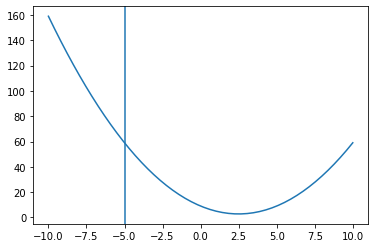

In [105]:
fig, ax = plt.subplots()

# Function
ax.plot(x_num, y_num)

# Constraint
ubx = -5
ax.axvline(ubx)

5. We now want to solve the problem shown above using CasADi [nlpsol](https://web.casadi.org/docs/#creating-nlp-solvers). Please investigate the CasADi documentation and create the problem.

Note that we are not solving the problem yet.

In [118]:
# Write your code here!
nlp = {'x':x, 'f':y}
solver = nlpsol('solver', 'ipopt', nlp)

<span class="graffiti-highlight graffiti-id_b43xnpm-id_geuc8sk"><i></i><button>Hide Solution</button></span>

In [119]:
# Define the problem
prob = {'x':x, 'f':y}
# Get a configure solver instance
solver = nlpsol('solver','ipopt',prob)


Quickly investigate the solver object:

In [120]:
print(solver)

solver:(x0,p[],lbx,ubx,lbg[0],ubg[0],lam_x0,lam_g0[0])->(x,f,g[0],lam_x,lam_g[0],lam_p[]) IpoptInterface


We see that it is similar to a regular CasADi function, e.g.:

In [116]:
y_fun

Function(y:(i0)->(o0) SXFunction)

The optimizer takes the following important inputs:
- `x0`: The initial guess
- `p`: Parameter of the optimization problem (we have none here).
- `lbx`, `ubx`: Lower and upper bound of the optimization variable `x`.
- `lbg`, `ubg`: Lower and upper bound of additional constraints `g` (we have none here)

and returns (in a dictionary)
- `x`: The optimal value of the optimization variables.
- `f`: The optimal cost of the objective function.

6. Solve the optimization problem. Use an initial guess and the previously defined upper bound for x (`ubx`).

In [125]:
# Write your code here.
res = solver(x0 = -7,ubx = ubx)
print(res)

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        1

Total number of variables............................:        1
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        1
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

<span class="graffiti-highlight graffiti-id_plgz1jn-id_xyw7ncr"><i></i><button>Hide Solution</button></span>

In [128]:
res = solver(x0=-7, ubx=ubx)


This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        1

Total number of variables............................:        1
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        1
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

7. Obtain the optimal value of `x` and `y` from the resulting dictionary. Call them `x_opt` and `y_opt`.

In [129]:
# Write your code here.
x_opt = res['x']
y_opt = res['f']
print(x_opt, y_opt)

-5 59


<span class="graffiti-highlight graffiti-id_kan0wmb-id_31mg9wn"><i></i><button>Show Solution</button></span>

We can now plot the solution in the previously created diagram:

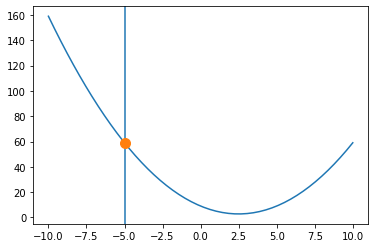

In [130]:
ax.plot(x_opt,y_opt, 'o', markersize=10)
fig

## <span class="graffiti-highlight graffiti-id_49th6jz-id_rxsyktj"><i></i>Task 03: Rectangle with largest area inside a polyhedron</span>

After this first impressions on how to use CasADi for optimization, we will in this exercise work on a more challenging problem.

Consider the problem of finding the rectangle with largest possible area $a$ that lies in a polyhedron described by a set of linear inequalities

$$\mathcal{P}(A,b) = \{x\in \mathbb{R}^2|Ax \leq b\}.$$

The rectangle is defined by 

$$\mathcal{R}(l,u) = \{x \in \mathbb{R}^2 \, | \, l\leq x \leq u,\ l,u \in \mathbb{R}^2\}.$$

The side length is thus:

$$
a = u_0 - l_0\\
b = u_1 - l_1
$$

and the area results in $A=a\cdot b$.

We consider the following polyhedron $\mathcal{P}$:
\begin{align*}
A=\begin{bmatrix} 
                  2 & -4 \\
                  2 & 1 \\
                  -4 & 4 \\
                  -4 & 0 \end{bmatrix},
                  \qquad b = \mathbf{1}.
\end{align*}

**Hint.** If the corners of a box lie inside a polyhedron, the box does too.

To help you visualize the problem, here is a plot of the polyhedron:

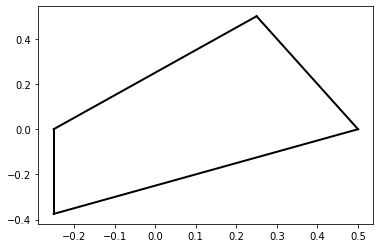

In [182]:
fig, ax = plt.subplots()

# Plot polyhedron
ax.plot([-1/4,-1/4],[-0.375, 0.0],'-k',linewidth=2)
ax.plot([-0.25, 0.25],[0.0, 0.5],'-k',linewidth=2)
ax.plot([0.25, 0.5],[0.5, 0.0],'-k',linewidth=2)
ax.plot([0.5, -0.25],[0.0, -0.375],'-k',linewidth=2)
plt.show()

Of course you don't need to copy the parameters for the polyhedron. Here they are:

In [183]:
A = np.array([[ 2, -4],
              [ 2,  1],
              [-4,  4],
              [-4,  0]])
              
b = np.ones((4,1))

1. Define the symbolic variables `l` und `u` for the rectangle $\mathcal{R}(l,u)$.
2. Use `l` und `u` to define the (4) edges of the rectangle.

In [184]:
# Write your code here!
l = SX.sym('l',2, 1)
u = SX.sym('u',2, 1)

x1 = l
x2 = u
x3 = vertcat(l[0], u[1])
x4 = vertcat(u[0], l[1])


<span class="graffiti-highlight graffiti-id_jeu2tdv-id_2o27jfl"><i></i><button>Show Solution</button></span>

3. Create an expression `g` that represents the polyhedron constraints $Ax\leq b$. 

**Note**: Regardless how you create `g` it must be a vector in the end (of type `casadi.SX`).

**Note**: Most likely you will need to use `vertcat` and/or `horzcat`.

In [185]:
# Write your code here!
#x = SX.sym('x',2,1)
#g = horzcat(A@x -b)
#print(g)
g = (A@horzcat(x1,x2,x3,x4)-b).reshape((-1,1))
#reshape for horizontal

<span class="graffiti-highlight graffiti-id_aqk9ftl-id_j1qrkvf"><i></i><button>Hide Solution</button></span>

In [144]:
# The polyhedron constraint:
g = (A@horzcat(x1,x2,x3,x4)-b).reshape((-1,1))
g

SX(@1=2, @2=-4, @3=1, @4=4, [(((@1*l_0)+(@2*l_1))-@3), (((@1*l_0)+l_1)-@3), (((@2*l_0)+(@4*l_1))-@3), ((@2*l_0)-@3), (((@1*u_0)+(@2*u_1))-@3), (((@1*u_0)+u_1)-@3), (((@2*u_0)+(@4*u_1))-@3), ((@2*u_0)-@3), (((@1*l_0)+(@2*u_1))-@3), (((@1*l_0)+u_1)-@3), (((@2*l_0)+(@4*u_1))-@3), ((@2*l_0)-@3), (((@1*u_0)+(@2*l_1))-@3), (((@1*u_0)+l_1)-@3), (((@2*u_0)+(@4*l_1))-@3), ((@2*u_0)-@3)])

4. Write an expression `f` for the cost function (maximize the area of the rectangle) in terms of `l` und `u`.

**Note:** The `nlpsol` interface is always used for a minimization problem. To maximize, we need to multiply our cost function with -1.

In [186]:
# Write your code here!
cost = Function('cost', [l,u],[-(u[0] - l[0])*(u[1] - l[1])])

<span class="graffiti-highlight graffiti-id_uoi9dw2-id_s8cwun2"><i></i><button>Hide Solution</button></span>

In [187]:
# The cost function
f = -((u[0]-l[0]) * (u[1]-l[1]))


5. Create the solver object.

In [188]:
# Write your code here!

nlprob = {'x':vertcat(l,u), 'f':f, 'g':g}
solver = nlpsol('solver','ipopt', nlprob)


SX([l_0, l_1, u_0, u_1])

<span class="graffiti-highlight graffiti-id_xhjr26v-id_0vucuol"><i></i><button>Hide Solution</button></span>

In [ ]:
# Define the problem
prob = {'x':vertcat(l,u), 'f':f, 'g':g}
solver = nlpsol('solver','ipopt', prob)


6. Solve the optimization problem (name result `res`).
7. The solver returns the solution as a single vector `x`. Extract the components `l` and `u` with indices.

**Note**: Don't forget the initial guess and the upper bound for the constraints `g`.

In [170]:
# Write your code here!
res = solver(x0=np.array([0,0,0,0]), ubg = 0)
l = res['x'][:2]
u = res['x'][2:]

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:       28
Number of nonzeros in Lagrangian Hessian.............:        4

Total number of variables............................:        4
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:       16
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       16

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -

<span class="graffiti-highlight graffiti-id_35otcem-id_w29hkd7"><i></i><button>Hide Solution</button></span>

In [189]:
#res = solver(ubg = 0, x0=np.array([-1,-1, 1, 1]))
x=res['x']
l = res['x'][:2]
u = res['x'][2:]




DM([1.15224e-09, -0.0625, 0.375, 0.25])

Let's see how the solution fits in the polyhedron:

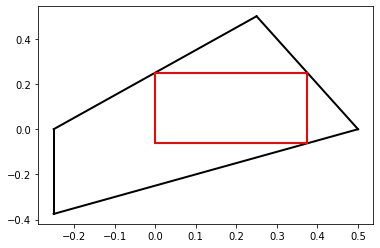

In [190]:
# Plot maximized rectangle
ax.plot([l[0],l[0]],[l[1],u[1]],'-r',linewidth=2)
ax.plot([l[0],u[0]],[u[1],u[1]],'-r',linewidth=2)
ax.plot([u[0],u[0]],[u[1],l[1]],'-r',linewidth=2)
ax.plot([u[0],l[0]],[l[1],l[1]],'-r',linewidth=2)
fig

Congratulations! You have finished the second exercise.